In [19]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import time
import matplotlib.pyplot as plt 
import random
import csv 

In [20]:
pd.set_option('display.max_rows',300)
pd.set_option('display.max_columns',100)
pd.set_option('max_colwidth',800)

plt.figure(figsize=(20,10))
# plt.subplots(figsize=(20,20))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [21]:

android_dev = pd.read_csv('datasets/Android_Developer.csv')
ai = pd.read_csv('datasets/Artificial_Intilligence.csv')
backend_dev = pd.read_csv('datasets/Backend_Developer.csv')
business_analyst = pd.read_csv('datasets/Business_Analyst.csv')
cloud_computing = pd.read_csv('datasets/Cloud_Computing.csv')
data_analyst = pd.read_csv('datasets/Data_Analyst.csv')
data_scientist = pd.read_csv('datasets/Data_Scientist.csv')
deep_learning = pd.read_csv('datasets/Deep_Learning.csv')
devops = pd.read_csv('datasets/Devops_Engineer.csv')
flutter_dev = pd.read_csv('datasets/Flutter_Developer.csv')
full_stack_dev = pd.read_csv('datasets/Full_Stack_Developer.csv')
game_artist = pd.read_csv('datasets/Game_Artist.csv')
game_designer = pd.read_csv('datasets/Game_Designer.csv')
game_developer = pd.read_csv('datasets/Game_Developer.csv')
iOS_dev = pd.read_csv('datasets/iOS_Developer.csv')
java_dev = pd.read_csv('datasets/Java_Developer.csv')
ml = pd.read_csv('datasets/Machine_Learning.csv')
mean = pd.read_csv('datasets/MEAN_Stack_Developer.csv')
mern = pd.read_csv('datasets/MERN_Stack_Developer.csv')
net_security_engg = pd.read_csv('datasets/Network_Security_Engineer.csv')
node_js = pd.read_csv('datasets/Node_Js_Developer.csv')
php_dev = pd.read_csv('datasets/PHP_Developer.csv')
py_dev = pd.read_csv('datasets/Python_Developer.csv')
react_js= pd.read_csv('datasets/React_Js_Developer.csv')
react_native_dev = pd.read_csv('datasets/React_Native_Developer.csv')
sys_admin = pd.read_csv('datasets/System_Administrator.csv')
ui_ux = pd.read_csv('datasets/UI_UX_Developer.csv')
web_dev = pd.read_csv('datasets/Web_Developer.csv')

In [22]:
filename = [ android_dev, ai, backend_dev, business_analyst, cloud_computing, data_analyst, data_scientist, 
            deep_learning, devops, flutter_dev, full_stack_dev, game_artist, game_designer,game_developer, iOS_dev, java_dev, ml, mean, mern, 
            net_security_engg, node_js, php_dev, py_dev, react_js, react_native_dev, sys_admin, ui_ux, web_dev]
print(len(filename))

28


In [37]:
py_dev

,Job_Name,Company_Name,Location,Salary,Description,Skills,Yearly Salary
0,Python Developer,Computronics International Ltd,"Kailash Colony, Delhi, Delhi",224514 - 1078080,Coordinating with front-end developers.We are looking for an experienced Python developer to join our engineering team and help us create dynamic software…,"Core Python,Web Frameworks,Object Relational Mappers,Data Scientists,achine Learning Skill,Artificial Intelligence,Deep Learning,Multi-Process Architecture,Analytical Skills,Design Skills,Communication Skills,Version Control,Front-End Technologies Knowledge,The Ability of Integration,Server-Side Templating Language,Event-Driven programming, Good Debugging,Unit Test Skills,Code Versioning, Database Schemas Creation Ability, Logical Thinking Ability",651297.0
1,Python/Django Developer,virtualwebs servers Pvt Ltd,NaN,25000 - 30000,We are looking to hire software developers with experience of about 2 to 3 years in python and Django.Python Developer responsibilities include writing and…,"Core Python,Web Frameworks,Object Relational Mappers,Data Scientists,achine Learning Skill,Artificial Intelligence,Deep Learning,Multi-Process Architecture,Analytical Skills,Design Skills,Communication Skills,Version Control,Front-End Technologies Knowledge,The Ability of Integration,Server-Side Templating Language,Event-Driven programming, Good Debugging,Unit Test Skills,Code Versioning, Database Schemas Creation Ability, Logical Thinking Ability",330000.0
2,Python/Django Developer,Antonal Technologies,"Kochi, Kerala",10000 - 20000,Hands-on programming experience in building web applications using python and Django.We are looking for an experienced Python/Django developer to join our…,"Core Python,Web Frameworks,Object Relational Mappers,Data Scientists,achine Learning Skill,Artificial Intelligence,Deep Learning,Multi-Process Architecture,Analytical Skills,Design Skills,Communication Skills,Version Control,Front-End Technologies Knowledge,The Ability of Integration,Server-Side Templating Language,Event-Driven programming, Good Debugging,Unit Test Skills,Code Versioning, Database Schemas Creation Ability, Logical Thinking Ability",180000.0
3,Python Developer,Xpheno,"Bengaluru, Karnataka",,"Python Backend developer, Django and Restful API.Talent 500 is redefining talent acquisition for leading enterprises.Data Structure, Algothorium and OOPS etc.","Core Python,Web Frameworks,Object Relational Mappers,Data Scientists,achine Learning Skill,Artificial Intelligence,Deep Learning,Multi-Process Architecture,Analytical Skills,Design Skills,Communication Skills,Version Control,Front-End Technologies Knowledge,The Ability of Integration,Server-Side Templating Language,Event-Driven programming, Good Debugging,Unit Test Skills,Code Versioning, Database Schemas Creation Ability, Logical Thinking Ability",415000.0
4,Python/Django Developer,Techamic Solutions,"Noida, Uttar Pradesh",500000 - 800000,We are hiring Python Developer having strong knowledge on Python and Django.You must have more than 4-5 years of experience in software development and 2 years…,"Core Python,Web Frameworks,Object Relational Mappers,Data Scientists,achine Learning Skill,Artificial Intelligence,Deep Learning,Multi-Process Architecture,Analytical Skills,Design Skills,Communication Skills,Version Control,Front-End Technologies Knowledge,The Ability of Integration,Server-Side Templating Language,Event-Driven programming, Good Debugging,Unit Test Skills,Code Versioning, Database Schemas Creation Ability, Logical Thinking Ability",650000.0
5,Python - Django Developer,Jakhar InfoTech,"Jaipur, Rajasthan",10000 - 40000,Job Description: We are looking to hire Python/Django Developers to join our developers’ team and help us develop and maintain various applications.,"Core Python,Web Frameworks,Object Relational Mappers,Data Scientists,achine Learning Skill,Artificial Intelligence,Deep Learning,Multi-Process Architecture,Analytical Skills,Design Skills,Communication Skills,Vers

In [24]:
android_dev.shape

(475, 6)

# Dropping Duplicate Values from each DataFrame

In [25]:
def Duplicate_Dropper(dataframe_name):
    for i in range(0,len(dataframe_name)):
        dataframe_name[i].drop_duplicates(subset="Description", keep= 'first', inplace=True)
    
Duplicate_Dropper(filename)

In [26]:
react_native_dev.drop(10,inplace=True)

# Replacing NAN Values

In [27]:
def NA_filler(dataframe_name):
    for i in range(0,len(dataframe_name)):
        dataframe_name[i]['Salary'].fillna('',inplace=True)

NA_filler(filename)

# Salary Cleaning

In [28]:

def Salary_Cleaning(salary):
    
    sal = salary.split('-')
    if len(sal)==2:
        added_sal = (float(sal[0]) + float(sal[1]))//2
        if added_sal <100000:
            converted_sal = added_sal*12
            return converted_sal
        else:
            return added_sal
    try:
        return float(sal[0])
    except Exception as e:
 
        return None

# Calling Salary Cleaner

In [29]:
def calling_salary_cleaning(dataframe_name):
    for i in range(0,len(dataframe_name)):
            dataframe_name[i]['Yearly Salary'] = dataframe_name[i]['Salary'].apply(Salary_Cleaning)
            
calling_salary_cleaning(filename)

# Converting outlier salary

In [30]:
def Lower_Salary(salary):
    if salary <=99999:
        sal = salary*12
        return sal
    else:
        return salary


# Calling Lower Salary

In [31]:
def calling_lower_salary(dataframe_name):
    for i in range(0,len(dataframe_name)):
        dataframe_name[i]['Yearly Salary'] = dataframe_name[i]['Yearly Salary'].apply(Lower_Salary)

calling_lower_salary(filename)

# Predicting NaN values

In [32]:
def predicting_nan_values(dataframe_name):
    for i in range(0,len(dataframe_name)):
        dataframe_name[i]['Yearly Salary'] = round(dataframe_name[i]['Yearly Salary'].interpolate())
        dataframe_name[i]['Yearly Salary'] = dataframe_name[i]['Yearly Salary'].fillna(method='bfill')
        dataframe_name[i]['Yearly Salary'] = dataframe_name[i]['Yearly Salary'].fillna(method='ffill')
        

predicting_nan_values(filename)

# Check for nan value

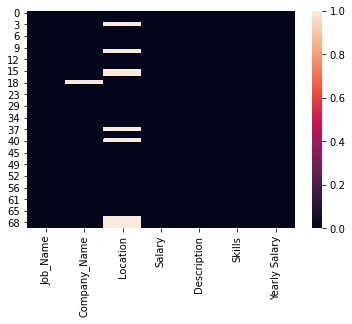

In [33]:
sns.heatmap(react_js.isnull())

In [34]:
# for i in range(0,len(demo_list)):
#     if demo_list[i] in demo:
#         print(demo_list[i])
        
        
    

# def skill_checker(android_dev):
#     for i in range(0, len(android_dev)):
        
#         for j in range(0,len(demo_list)):
#             if demo_list[j] in android_dev['Description'].tolist():
#                 android_dev['Skills'] = demo_list[i]
            
# skill_checker(android_dev)
# print(len(android_dev['Description']))



# # def skill_checker(dataframe_name):
# #     for i in range(0, len(dataframe_name)):
        
# #         for i in range(0,len(demo_list)):
# #         if demo_list[i] in android_dev['Description']:
# #             print(demo_list[i])
            
# # skill_checker(filename)


# x = android_dev['Description'].tolist()

# for i in range(0,len(x)):
#     for j in range(0,len(demo_list)):
#         if demo_list[j] in x[i]:
#             android_dev['Skills'] = demo_list[j]
#             return android_dev['Skills']
#         else:
#             return None
# #         print(x[i],demo_list[j])
# #         print(demo_list[j])
    

In [35]:
# skills=[
# "JAVA,UNDERSTANDING OF XML,ANDROID SDK,ANDROID STUDIO,APIS,DATABASES,MATERIAL DESIGN,Kotlin,UX/UI,Critical Thinking,Cross-Platform,Adaptability",
# "Scala,Java,Python,mathematical skills,knowledge of cloud applications,computer languages,excellent communication,analytical skills,machine learning,intellectual curiosity,business,data science,data statistics,data structures,trees,optimization algorithmsgraphs,linear programming,Bayesian principles,conditional probability, Statistics,probability distribution, Data modeling, model validation, Linear Algebra, Calculus, Statistics, Signal Processing Techniques, Applied Math and Algorithms, Neural Network Architectures",
# "PostgreSQL,MySQL,GraphQL,Node.js,MongoDB,Server Handling,web-frameworks,optimize queries","Consultancy Skills,Technical Understanding,Oral skills, written communication skills,facliation skillss.Interpersonal skills, consultative skills, Problem Solvong, Analyticial thinking, Organizational Skills, Knowledge of business structure",
# "Database skills,Programming skills,Linux,DevOpsQuality Assurance,Information security,cloud technologies,multi-cloud environment,integrated, cloud certifications,DevOps,Measurement,analysis,Presentation Sklls, machine Learning",
# "Structured Query Language,Microsoft Excel,Critical Thinking,Python-Statistical Programming,Data Visualization,Data Visualization,Spreadsheets,Public speaking,Research,Collaboration,Writing,Statistics",
# "Statistics,R,Python,Data Extraction,Data Transformation,Data Loading,Data Wrangling , Data Exploration,Machine Learning Algorithms,Advanced Machine Learning (Deep Learning),Big Data Processing Frameworks ,Data Visualization",
# "Deep Learning with TensorFlow,TensorFlow,Natural Language Processing,NLP,Robotic Process Automation,Deep Learning,Machine Learning,AI",
# "Linux Fundamentals,Scripting,Knowledge On Various DevOps,Technologies,Continuous Integration,Continuous Delivery,Infrastructure As Code,Key concepts of DevOps,Soft skills,Strong Communication,Collaboration Skills, Software Security Skills,Testing Skills,Proactivity",
# "Good knowledge of Git,Understanding of Computer Science,software development life cycle,Strong knowledge of different architecture approaches,Experience with GoF patterns,Knowledge of SQL,Fix bugs,Write clean code,Investigate technologies,Follow new trends,Strong knowledge of networking,Experience in programming languages for mobile development Kotlin or Swift,Knowledge of Dart programming language,Understanding of Flutter framework,Experience in Android ,Experience in IOS",
# "HTML5,CSS3,JavaScript,GitHub,Git,Python,Java,Ruby,Web architecture,HTTP and REST,Database storage,relational data,Knowledge of NoSQL databases,Knowledge of web storage,Basic design skills,NPM,Soft skills",
# "Strong IT skills,Problem-solving aptitude,Time management skills,Creativity and culture,Communication skills,Stay abreast of industry developments,Database design,implementation and management,Software Development Frameworks,Virtual Reality Software Design,User Interface Design,IT Professional Practice Project,C++,Level design,Game Development,Adobe Photoshop,Maya,EPIC Unreal Engine,Zbrush,Research,Organizational Skills,Writing,Problem Solving,Communication Skills,Creativity,Collaboration,Teamwork",
# "Creativity,Artistic vision,A passion for video games,Storytelling ability,Wide-ranging knowledge of gaming trends,Strong analytical frame of mind,Excellent programming skills,Ability to work as part of a team",
# "Collaboration,Time management,Criticaial Thinking,Effective communication, Creativity,Stortelling ability,Adaptablity,Programming knwoldge,Multimedia Development software,Persistence",
# "The Swift 3.0 programming language,Apple's Xcode IDE,Spatial Reasoning,Design Guidelines,UI and UX design experience,Apple Human Interface Guidelines,Networking,Core Data,Grand Central Dispatch",
# "Knowledge of Object-Oriented Programming,design,Work experience with at least one of the Java frameworks,Knowledge of relational databases,SQL,ORM,HTML,CSS,JavaScript,JQuery,Proficient in Java,JavaScript,javaApplts,java Servlets,Java Beans,Excellent communication skills,Interpersonal Skills,Motivated team player,ability to reflect leadership skills,MVC,JDBC,JSP,SOAP,RESTful,SWING,SWT,AWT,Junit,TESTNG,Spoock,Mockito,problem-solving",
# "Statistics,Probability,Data Modeling,Programing Skills,Programming Fundamentals,Applying ML Libraries & Algorithms,Software Design,Python,R,C,C++",
# "Node js,Mongo DB,Angular js,Express Js,DEvelop,Test,fast,robust, highly responsive,relational databases,non-relational databases,development environment tools,development environment tools,PHP, jQuery, MySQL, Symfony, OOPS",
# "MongoDB,Express JS,React, NodeJS,HTML5,CSS3,JavaScript,GitHub,Git,Python,Java,Ruby,Web architecture,HTTP and REST,Database storage,relational data,Knowledge of NoSQL databases,Knowledge of web storage,Basic design skills,NPM,Soft skills",
# "Secure network architecture,Vulnerability testing,Threat modeling,Virtualization technologies,Cloud security,Firewalls,Encryption solutions,Secure coding practices,Innovation,Collaboration,Problem solving,Communication",
# "Node.js,Web application frameworks,Security,Databases,Package management,Source control,Oops concepts,Callback function,Mongodb,NPM,Express,RESTful APIs, Front-End Technologies,Asynchronous Programming,Authorization",
# "PHP,Ajax,jQuery,MySQL,JavaScript,CSS,HTML,APIs,Unix,Linux, MVC Framework Architecture,PHPUnit- a unit testing framework,PHP- an open-source web framework,Photoshop,similar design tool,Good communication skills,A knack for problem-solving,The ability to think critically",
# "Core Python,Web Frameworks,Object Relational Mappers,Data Scientists,achine Learning Skill,Artificial Intelligence,Deep Learning,Multi-Process Architecture,Analytical Skills,Design Skills,Communication Skills,Version Control,Front-End Technologies Knowledge,The Ability of Integration,Server-Side Templating Language,Event-Driven programming, Good Debugging,Unit Test Skills,Code Versioning, Database Schemas Creation Ability, Logical Thinking Ability",
# "React.js,DOM manipulation,JavaScript,JavaScript object model,React.js,React.js workflows, Flux,Redux,EcmaScript,data structure libraries,RESTful APIs,SON Web Token,Babel,Webpack,NPM, technical requirements, optimization,Git,SVN,Mercurial",
# "JavaScript,native iOS, Android development,React assumptions,Sentry,Bitrise,App Center,Redux,ESLint,Jest,React Native Testing Library,Problem-solving approach",
# "Problem-Solving and Administration,Networking,Cloud ,Automation and Scripting,Security and Monitoring,Account Access Management,IoT/Mobile Device Management,Scripting Languages,Hardware Management,SQL",
# "Research,Information Architecture,Wireframing,Prototyping,Visual Communication,Communication,Collaboration,UX research,UI prototyping,UX writing,User empathy,Interaction design,Coding,Analytics,Communication skills",
# "HTML,CSS skills,Analytical skills,Responsive design skills,JavaScript skills,Interpersonal skills,TestingSkills, debugging skills,Back-end basics,Search engine optimization,SEO"]


# path=['datasets/Android_Developer.csv','datasets/Artificial_Intilligence.csv','datasets/Backend_Developer.csv','datasets/Business_Analyst.csv',
#      'datasets/Cloud_Computing.csv','datasets/Data_Analyst.csv','datasets/Data_Scientist.csv','datasets/Deep_Learning.csv',
#      'datasets/Devops_Engineer.csv','datasets/Flutter_Developer.csv','datasets/Full_Stack_Developer.csv','datasets/Game_Artist.csv',
#      'datasets/Game_Designer.csv','datasets/Game_Developer.csv','datasets/iOS_Developer.csv','datasets/Java_Developer.csv',
#      'datasets/Machine_Learning.csv','datasets/MEAN_Stack_Developer.csv','datasets/MERN_Stack_Developer.csv','datasets/Network_Security_Engineer.csv',
#      'datasets/Node_Js_Developer.csv','datasets/PHP_Developer.csv','datasets/Python_Developer.csv','datasets/React_Js_Developer.csv',
#      'datasets/React_Native_Developer.csv','datasets/System_Administrator.csv','datasets/UI_UX_Developer.csv','datasets/Web_Developer.csv']
# minimum=[400000,500000,400000,500000,600000,400000,700000,500000,800000,400000,500000,300000,400000,500000,800000,500000,600000,300000,400000,500000,400000,300000,400000,500000,450000,300000,350000,400000]
# maximum=[800000,600000,600000,600000,800000,900000,1000000,600000,1000000,600000,700000,700000,600000,700000,1000000,600000,800000,800000,600000,600000,500000,600000,800000,700000,600000,700000,1000000,750000]
# no_of_turn=[197, 181, 233, 208, 201, 173, 180, 247, 159, 218, 178, 250, 189, 222, 194, 198, 203, 226, 229, 213, 207, 247, 211, 229, 211, 247, 182,211]
# print(len(minimum))
# print(len(maximum))
# print(len(path))
# print(len(skills))
# print(len(no_of_turn))
# print(len(filename))

In [36]:
# column_names = ['Job_Name','Company_Name','Location','Salary','Description','Skills']



# def random_fn(Job_name):
#     return random.choice(Job_name)
    
# for i in range(0,len(filename)):
#     Job_name=filename[i].Job_Name.to_list()
# #     print(Job_name)
# #     Job_name.remove('Job_Name')
# #     print(Job_name)

#     Company_name=filename[i].Company_Name.to_list()
# #     print(Company_name)
# #     Company_name.remove('Company_Name')
# #     print(Company_name)

#     Location=filename[i].Location.to_list()
# #     print(Location)
# #     Location.remove('Location')
# #     print(Location)

 

#     Description=filename[i].Description.to_list()
# #     print(Description)
# #     Description.remove('Description')
# #     print(Description)

#     file = open(path[i], 'a+',encoding="utf8", errors='ignore', newline ='') 
#     with file: 
#     # identifying header   
#         header = ['Job_Name','Company_Name','Location','Salary','Description','Skills'] 
#         writer = csv.DictWriter(file, fieldnames = header) 
        
#         for j in range(0,no_of_turn[i]):
#             random_Job_name=random_fn(Job_name)
#             random_Company_name=random_fn(Company_name)
#             random_Location=random_fn(Location)
#             random_Description=random_fn(Description)
#             writer.writerow({'Job_Name' : random_Job_name,  
#                              'Company_Name': random_Company_name,  
#                              'Location': random_Location,
#                              'Salary' :  random.randrange(minimum[i],maximum[i],10000),
#                              'Description' :  random_Description,
#                              'Skills' :skills[i]}) 
#     file.close()